<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture 8 Day 1</div>
<div style="text-align: right">Dino Konstantopoulos, 28 October 2019, with material from Carl Rasmussen and John P. Cunningham</div>

# Statistics + Linear Algebra = Gaussian Processes (GP)

Gaussian Processes is a mix of Bayesian Analysis and Linear Algebra, so it's the ***3rdd application of our Linear Algebra***, after **graphs** and **games**. We also learn a bit about [Fintech](https://en.wikipedia.org/wiki/Financial_technology), and a number of other things relevant to Data Science, today. Your ability to model datasets is going to increase exponentially!

The bible on GPs is [Rasmussen & Williams, Gaussian Processes for Machine Learning](http://www.gaussianprocesses.org/).

The whole point of your bayesian athletic analysis HW (and why I gave you an extra week) is to find correlation between data columns and then build a related model. Absent correlations, you cannot model the data using histograms and Bayesian analysis, and ML algorithms will yield **junk** that just learns data by heart and is ***no good*** at predicting datapoints that are not part of the training set.

So the whole point is to do ***very good Exploratory Data Analysis*** (EDA). The modern data scientist's method follows the **scientific method**. The syntax and the adjectives of this method are often statistical.

Statisticians use **linear regression** as the primary prediction tool, and the study of the **correlation coefficient** is the primary means of evaluating the significance and potential usefulness of predictions. The most important tool for correlation is the **Pearson correlation coefficient**. But in this notebook, we'll uncover a *better one*, which reveals **non-linear** dependences!

## 1. Variance and standard deviation

I love dogs. Here are some of  my favorite species, with heights in millimetres:

<br />
<center>
<img src="ipynb.images/dogs.jpg" width=400 />
</center>

Heights (at the shoulders) are: 600mm, 470mm, 170mm, 430mm and 300mm.

- Compute the mean:

The mean (average) height is 394 mm. Let's plot this on the chart:

<br />
<center>
<img src="ipynb.images/dogs-mean.jpg" width=400 />
</center>

- Now, calculate each dogs difference from the mean:

<br />
<center>
<img src="ipynb.images/dogs-variance.jpg" width=400 />
</center>

- To calculate the Variance, take each difference, square it, and then average the result. Do this below:

So, the Variance is 21,704.

And the Standard Deviation is just the square root of Variance, so:

And the good thing about the Standard Deviation is that it is **useful**. Now we can show which heights are within one Standard Deviation (147mm) of the Mean:

<br />
<center>
<img src="ipynb.images/dogs-standard-deviation.jpg" width=400 />
</center>

So, using the Standard Deviation we have a ***standard*** way of knowing what is **normal**, and what is **extra large** or **extra small**:

The [Bernese Mountain Dog](https://www.akc.org/dog-breeds/bernese-mountain-dog/) is extra large. The [Dachshund](https://www.akc.org/dog-breeds/dachshund/) is extra small

## 2. Covariance point estimate

[Covariance](https://en.wikipedia.org/wiki/Covariance) is a measure of the joint variability of **two** random variables.

The relationship between two observed variables, $X$, and $Y$, which are almost always a sample statistic rather than a population parameter. The estimate of the sample **means** for $X$ and $Y$ is $\hat{X}$, and $\hat{Y}$ respectively, for a data set of n samples. The statistics $\sigma_x$, and $\sigma_y$ are the estimates of the **standard deviations** of the two variables, and the corresponding estimates of the variances can be denoted as $\sigma_x^2$, $\sigma_y^2$. The **Pearson correlation coefficient** is:

$$r = \frac{\sum_i^N (X_i - \hat{X}) \; (Y_i - \hat{Y})}{\sum_i^N (X_i - \hat{X})^2 \; \sum_i^N(Y_i - \hat{Y})^2}$$

If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values, (i.e., the variables tend to show similar behavior), the covariance is positive.

In the opposite case, when the greater values of one variable mainly correspond to the lesser values of the other, (i.e., the variables tend to show opposite behavior), the covariance is negative.

The covariance of two variables is highest when they ***vary together***: a high value of $X$ yields a low value of $Y$, or the opposite. When the variables change in a connected fashion, they co-vary, and thus their covariance is high.

The sign of the covariance therefore shows the tendency in the linear relationship between the variables. 

The **normalized version** of the covariance, the [correlation coefficient](https://en.wikipedia.org/wiki/Correlation_coefficient), however, shows by its magnitude the strength of the linear relation.

In [16]:
from numpy import array
from numpy import cov
from numpy import std

x = array([1,2,3,4,5,6,7,8,9])
print(x)

y = array([9,8,7,6,5,4,3,2,1])
print(y)

Sigma = cov(x,y)[0,1]
print(Sigma)

[1 2 3 4 5 6 7 8 9]
[9 8 7 6 5 4 3 2 1]
-7.5


The magnitude of the covariance is not easy to interpret because it is *not normalized* and hence ***depends on the magnitudes of the variables, and on their units of dimension***. 

The covariance can be normalized to a score between -1 and 1 to make the magnitude interpretable by dividing it by the standard deviation of X and Y. The result is called the **correlation** of the variables, also called the **Pearson correlation coefficient**, named for the developer of the method.

In [21]:
r = cov(x, y)[0,1] / (std(x) * std(y))
r

-1.125

In [22]:
from numpy import corrcoef
Sigma = corrcoef(x,y)[0,1]
print(Sigma)

-1.0


We can see that the vectors are maximally negatively correlated as we designed.

Statisticians have **frequentist** tests to see if different samples belong to the same population, if they have the same means, variances, etc. These tests have many names, such as Chi squared-tests, T-tests, F-tests, etc. The tests all focus on probabilities, and are typically concerned with sample size. Central to the testing is the uncertainty of whether two samples or variables are really related and how.

The tests often make use of the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem), which generally allows for the use of the normal distribution for a large number of samples, even for non-normally distributed variables.

Significance testing of correlation coefficients was introduced by Fisher (1935). His approach was to test the null hypothesis that the correlation coefficient could have been found by random chance.

## 3. Feature selection and Covariance Matrix

The [covariance matrix](https://en.wikipedia.org/wiki/Covariance_matrix) is a square and symmetric matrix that describes the covariance between two or more random variables.

A covariance matrix is a generalization of the covariance of two variables and captures the way in which all variables in the dataset may change together.

The diagonal of the covariance matrix are the variances of each of the random variables. The non-diagonal term $(i,j)$ is the covariance between the $i$th random variable, and the $j$th random variable.

The covariance matrix is denoted by the uppercase Greek letter $\Sigma$.

The covariance matrix provides a useful tool for separating the structured relationships in a matrix of random variables. This can be used to decorrelate variables or applied as a transform to other variables. It is a key element used in the [Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) (PCA) data reduction method.

In [9]:
import numpy
from matplotlib import pyplot
%matplotlib inline
#pyplot.style.use('ggplot')
import pandas as pd
import seaborn as sns

We take data from [here](https://csegrecorder.com/columns/view/value-of-integrated-geophysics-201312). The data was defined (or created) with the following relationship:

$$Y = 1.5 * \text{Gross_pay} + 0.1 * \text{Phi_h}\; - 6 * \text{Position} + 1.5 * \text{Pressure}$$

The authors then add a bit of noise, and attempt a linear regression using all predictor variables.

In [27]:
data = pd.read_csv("data/Table2.csv")
data

Gross_pay  Phi_h  Position  Pressure  Random_1  Random_2  \
0         0.1    0.5       2.1        19         5       379   
1         1.0    4.0       1.1        16        13       269   
2         1.9   19.0       1.0        14        12       245   
3         3.1   21.7       2.1        17         6       273   
4         4.1   24.6       2.9        11        10       237   
5         4.9   39.2       1.1        12         7       278   
6         5.9   23.6       2.1        13        13       241   
7         7.0   63.0       2.0        13        20       269   
8         8.1   72.9       2.9        14         1       248   
9         8.9   35.6       2.8        16         1       210   
10       10.0  100.0       2.2        16        21       334   
11       11.1   77.7       2.0        14         1       340   
12       11.9   71.4       2.9        20        11       224   
13       13.0  117.0       1.1        16         9       338   
14       14.1  141.0       1.2        14        10       367   
15       15.1  105.7       1.0        17         3       363   
16       15.9   79.5       1.1        20        10       395   
17       16.0  160.0       1.2        17        15       295   
18       17.1   85.5       1.9        14         6       266   
19       18.0   90.0       2.8        18        19       210   
20       19.1  114.6       2.1        10        21       366   

    Gross_pay_transform  Production  
0                  3.54       15.10  
1                  5.79       21.30  
2                  8.51       22.75  
3                 11.52       15.72  
4                 10.16        7.71  
5                 11.14       22.67  
6                 15.04       18.11  
7                 15.10       24.30  
8                 14.49       24.04  
9                 16.90       25.11  
10                16.61       36.80  
11                17.81       36.42  
12                19.74       39.59  
13                17.70       51.60  
14                19.16       48.05  
15                21.97       51.72  
16                22.15       59.20  
17                24.24       58.30  
18                23.58       41.80  
19                23.77       44.20  
20                29.25       37.51

We do the same with Bayesian estimation, patsy-style:

In [28]:
import pymc3 as pm
with pm.Model() as glm_model:
    pm.glm.GLM.from_formula('Production ~ Gross_pay + Phi_h + Position + Pressure',
                            data,
                            family=pm.glm.families.Normal())
    trace2 = pm.sample(1000, tune=1000, init='adapt_diag', njobs=1)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, Pressure, Position, Phi_h, Gross_pay, Intercept]
100%|██████████| 2000/2000 [00:12<00:00, 163.51it/s]


In [30]:
pm.traceplot(trace2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1DAA2B048>,
      dtype=object)

In [32]:
pm.plot_posterior(trace2[500:], varnames=['Intercept', 'Gross_pay', 'Phi_h', 'Position', 'Pressure'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1DB44F630>,
      dtype=object)

Our analysis yields the following relationship between the data: 

$$Y = -1.739 + 1.362 * \text{Gross_pay} + 0.108 * \text{Phi_h} - 6.601 * \text{Position} + 1.752 * \text{Pressure}$$

The article authors find:

$$Y = -1.71 + 1.37 * \text{Gross_pay} + 0.11 * \text{Phi_h} - 6.66 * \text{Position} + 1.76 * \text{Pressure}$$

Pretty close! But the authors state that *(...) the weights are not quite correct*.

***What can we do to get better estimates?***

Let's do some EDA. The scatter matrix below includes bivariate scatter-plots in the upper triangle, contours in the lower triangle, shape of the bivariate distributions on the diagonal.

In [12]:
pyplot.rcParams["axes.labelsize"] = 18
g = sns.PairGrid(data, diag_sharey=False)
axes = g.axes
g.map_upper(pyplot.scatter, linewidths=1, 
            edgecolor="w", s=90, alpha=0.5)
g.map_diag(sns.kdeplot, lw = 4, legend=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
pyplot.show()

d:\Anaconda3.5.1\lib\site-packages\seaborn\distributions.py:400: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


Adding:

- [Spearman rank correlation](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) coefficient – a bit more robust than Pearson’s correlation coefficient
- Confidence interval for the correlation coefficient
- Probability of spurious correlation

..from [this article](https://mycarta.wordpress.com/2019/03/17/visual-data-exploration-in-python-correlation-confidence-spuriousness/).

In [43]:
import numpy as np
import scipy.stats as st

def confInt(r, nwells):
    z_crit = st.norm.ppf(.975) 
    std_Z = 1/np.sqrt(nwells-3)      
    E = z_crit*std_Z
    Z_star = 0.5*(np.log((1+r)/(1.0000000000001-r)))
    ZCI_l = Z_star - E
    ZCI_u = Z_star + E
    RCI_l = (np.exp(2*ZCI_l)-1)/(np.exp(2*ZCI_l)+1) 
    RCI_u = (np.exp(2*ZCI_u)-1)/(np.exp(2*ZCI_u)+1)
    return RCI_u, RCI_l

In [44]:
def P_spurious (r, nwells, nattributes):
    t_of_r = r * np.sqrt((nwells-2)/(1-np.power(r,2)))  
    p = st.t.sf(numpy.abs(t_of_r), nwells-2)*2 
    ks = np.arange(1, nattributes+1, 1)
    return np.sum(p * np.power(1-p, ks-1))

In [45]:
def r_crit(nwells, a):
    t = st.t.isf(a, nwells-2) 
    r_crit = t/np.sqrt((nwells-2)+ np.power(t,2))
    return r_crit

In [46]:
nwells = 21
rc = r_crit(21, 0.025)

In [51]:
from matplotlib import pyplot
%matplotlib inline

def corrfunc(x, y, rc=rc, **kws):
    r, p = st.spearmanr(x, y)
    u, l = confInt(r, 21)  
    if r > rc:
       rclr = 'g'
    else:
        rclr= 'm' 
    if p > 0.05:
       pclr = 'm'
    else:
        pclr= 'g'
    ax = pyplot.gca()
    ax.annotate("CC = {:.2f}".format(r), xy=(.1, 1.25), 
                xycoords=ax.transAxes, color = rclr, fontsize = 14)
    ax.annotate("CI = [{:.2f} {:.2f}]".format(u, l), xy=(.1, 1.1), 
                xycoords=ax.transAxes, color = rclr, fontsize = 14)
    ax.annotate("PS = {:.3f}".format(p), xy=(.1, .95), 
                xycoords=ax.transAxes, color = pclr, fontsize = 14)

Now:

- The correlation coefficient is coloured green if it is larger than the critical r, else coloured in purple
- The confidence interval is coloured green if both lower and upper are larger than the critical r, else coloured in purple
- The probability of spurious correlation is coloured in green when below 0.05 (or 5% chance)

d:\Anaconda3.5.1\lib\site-packages\seaborn\distributions.py:400: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


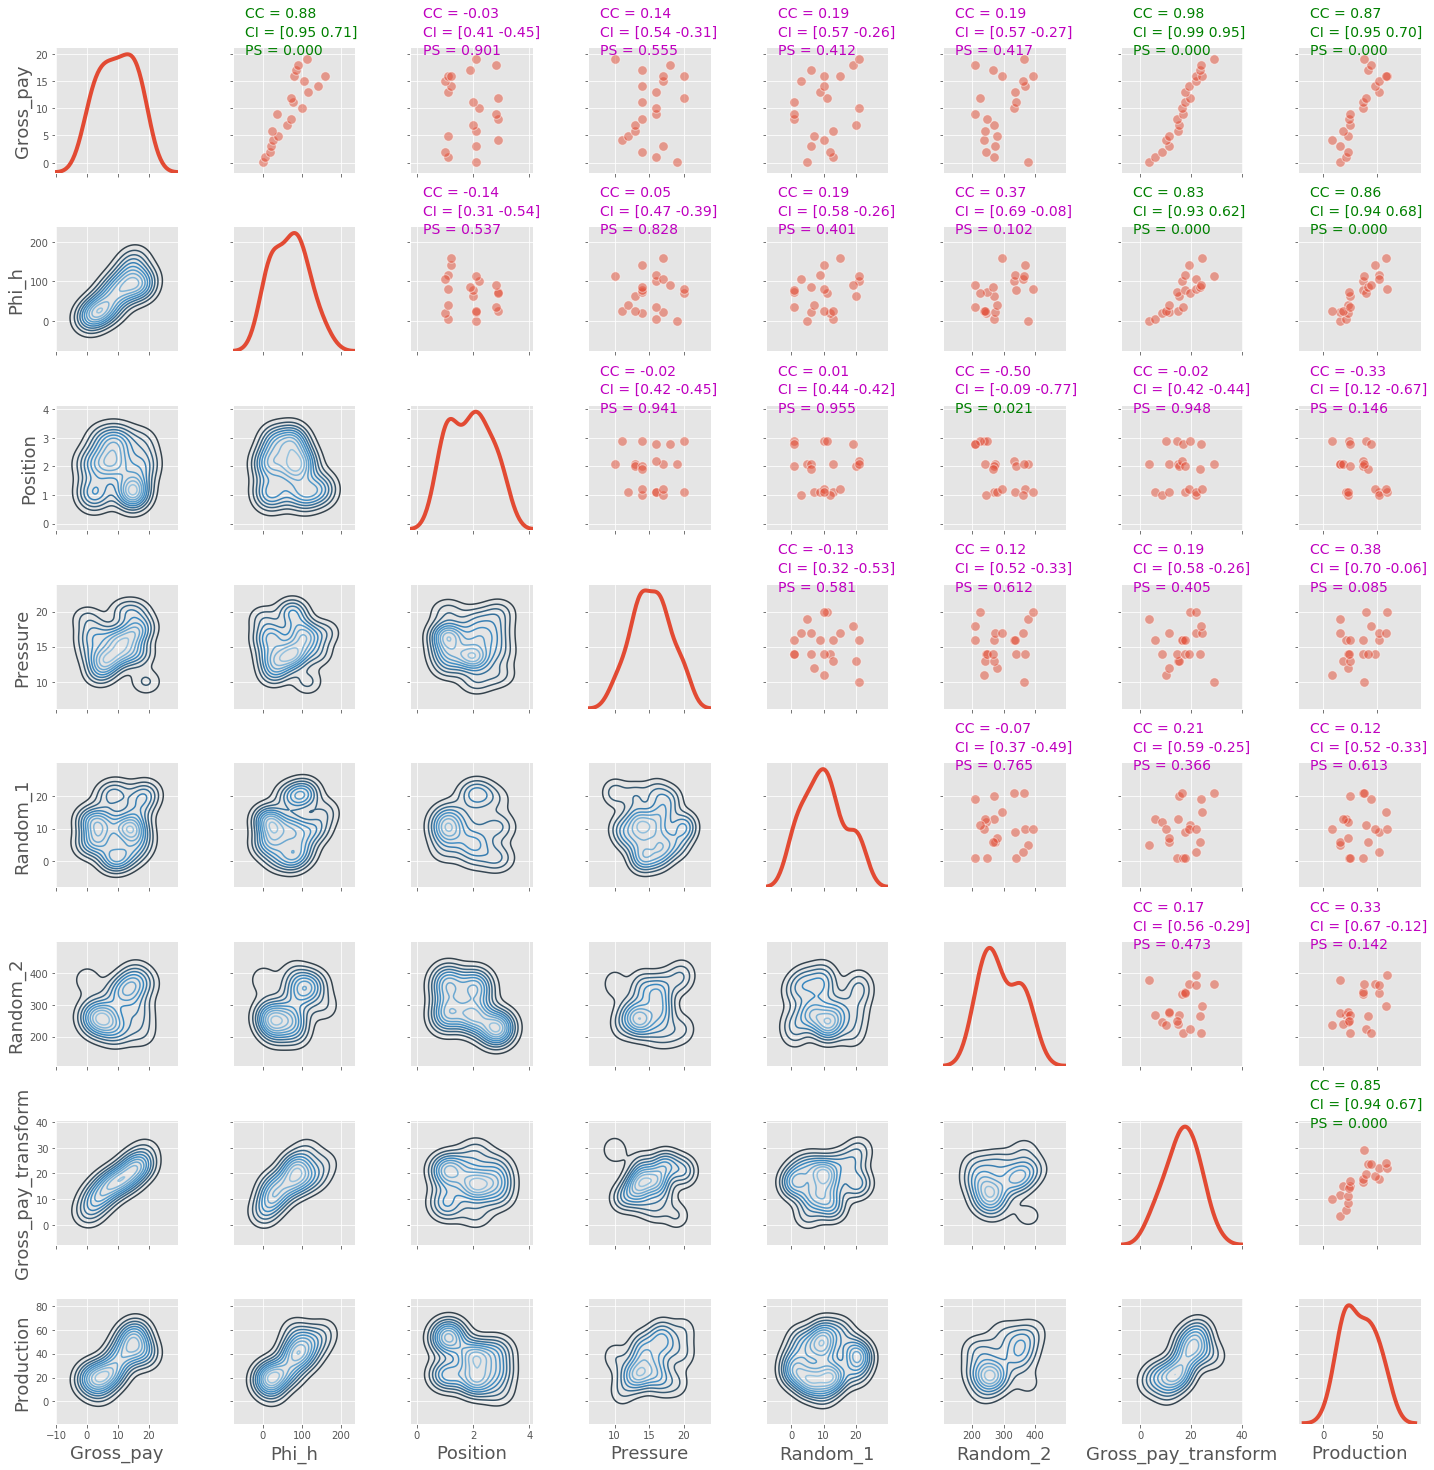

In [53]:
pyplot.rcParams["axes.labelsize"] = 18
g = sns.PairGrid(data, diag_sharey=False)
axes = g.axes
g.map_upper(pyplot.scatter, linewidths=1, edgecolor="w", s=90, alpha = 0.5)
g.map_upper(corrfunc)
g.map_diag(sns.kdeplot, lw = 4, legend=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
pyplot.show()

The more ***interesting variables***, because of strong correlation (as defined in this case by the rank correlation coefficient), are close together and reposition along the diagonal, so we can immediately appreciate that `Production`, `Phi_h`, and `Gross_Pay`, plus to a lesser extent `Position` (albeit this one with negative correlation to production) are related to one another. 

But wait, there is better!

Unfortunately, could not `pip install biokit` on Windows (works on the Mac), and biokit is known to have awesome correlation plots.

In [ ]:
from biokit.viz import corrplot
corr = data.corr(method='spearman')
c = corrplot.Corrplot(corr)
c.plot(method='ellipse', cmap='PRGn_r', shrink=1, rotation=45, upper='text', lower='ellipse')
fig = plt.gcf()
fig.set_size_inches(10, 8);

### distance correlation

I learned about **distance correlation** [here](https://mycarta.wordpress.com/2019/04/10/data-exploration-in-python-distance-correlation-and-variable-clustering/), and the author learned it himself at the 2018 CSEG/CASP Geoconvention talk Data science tools for petroleum exploration and production. 

Distance correlation ***does not assume a linear relationship between variables*** as does Pearson and Spearman, and even more importantly, whereas with Pearson and Spearman a correlation value of zero does not prove independence between any two variables, a ***distance correlation of zero does mean that there is no dependence between those two variables***! So in my opinion, it's more useful! [dcor](https://github.com/vnmabus/dcor) is the package, install it.
```(python)
pip install dcor
```

In [56]:
import dcor
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Production'], 
                                                                        data['Gross_pay'])))
print("p-value = {:.7f}".format(dcor.independence.distance_covariance_test(data['Production'], 
                                                                           data['Gross_pay'], 
                                                                           exponent=1.0, 
                                                                           num_resamples=2000)[0]))

distance correlation = 0.91
p-value = 0.0004998


In [59]:
def dist_corr(X, Y, pval=True, nruns=2000):
    """ Distance correlation with p-value from bootstrapping
    """
    dc = dcor.distance_correlation(X, Y)
    pv = dcor.independence.distance_covariance_test(X, Y, exponent=1.0, num_resamples=nruns)[0]
    if pval:
        return (dc, pv)
    else:
        return dc

In [63]:
def corrfunc(x, y, **kws):
    d, p = dist_corr(x,y) 
    #print("{:.4f}".format(d), "{:.4f}".format(p))
    if p > 0.1:
        pclr = 'Darkgray'
    else:
        pclr= 'Darkblue'
    ax = pyplot.gca()
    ax.annotate("DC = {:.2f}".format(d), xy=(.1, 0.99), xycoords=ax.transAxes, color = pclr, fontsize = 14)

In [64]:
g = sns.PairGrid(data, diag_sharey=False)
axes = g.axes
g.map_upper(pyplot.scatter, linewidths=1, edgecolor="w", s=90, alpha = 0.5)
g.map_upper(corrfunc)
g.map_diag(sns.kdeplot, lw = 4, legend=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
pyplot.show();

d:\Anaconda3.5.1\lib\site-packages\seaborn\distributions.py:400: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


Then, the author creates a square matrix of distance correlation values, then looks at correlational clustering of the variables: Instead of passing raw data to the algorithm, he passes the distance correlation matrix. 

In [65]:
# Create the distance method using distance_correlation
distcorr = lambda column1, column2: dcor.distance_correlation(column1, column2) 

# Apply the distance method pairwise to every column
rslt = data.apply(lambda col1: data.apply(lambda col2: distcorr(col1, col2)))

# check output
pd.options.display.float_format = '{:,.2f}'.format
rslt

Gross_pay  Phi_h  Position  Pressure  Random_1  Random_2  \
Gross_pay                 1.00   0.89      0.28      0.34      0.32      0.45   
Phi_h                     0.89   1.00      0.32      0.27      0.35      0.54   
Position                  0.28   0.32      1.00      0.22      0.32      0.54   
Pressure                  0.34   0.27      0.22      1.00      0.27      0.31   
Random_1                  0.32   0.35      0.32      0.27      1.00      0.23   
Random_2                  0.45   0.54      0.54      0.31      0.23      1.00   
Gross_pay_transform       0.97   0.83      0.23      0.38      0.35      0.39   
Production                0.91   0.88      0.45      0.43      0.29      0.54   

                     Gross_pay_transform  Production  
Gross_pay                           0.97        0.91  
Phi_h                               0.83        0.88  
Position                            0.23        0.45  
Pressure                            0.38        0.43  
Random_1                            0.35        0.29  
Random_2                            0.39        0.54  
Gross_pay_transform                 1.00        0.84  
Production                          0.84        1.00

Hooray, this is a very useful table!

Let’s calculate a couple of values directly, to be sure.

In [66]:
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Production'], data['Phi_h'])))
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Production'], data['Position'])))

distance correlation = 0.88
distance correlation = 0.45


What we expected!

Now let's use the table above as a matrix, rather than the raw data, to cluster the variables, and then display the result with a [heat-map](https://en.wikipedia.org/wiki/Heat_map) and accompanying [dendrograms](https://en.wikipedia.org/wiki/Dendrogram).

In [77]:
data.rename(index=str, columns={"Gross_pay_transform": "Gross_pay_tr"}, inplace=True)
distcorr = lambda column1, column2: dcor.distance_correlation(column1, column2)
rslt = data.apply(lambda col1: data.apply(lambda col2: distcorr(col1, col2)))

#h = heatmap.Heatmap(rslt)
#h.plot(vmin=0.0, vmax=1.1, cmap='cubehelix')
#fig = plt.gcf()
#fig.set_size_inches(22, 18)
#plt.gcf().get_axes()[1].invert_xaxis();

# heatmap
#ax = sns.heatmap(rslt, linewidth=0.5)
#fig = pyplot.gcf()
#fig.set_size_inches(12, 8)
#pyplot.gcf().get_axes()[1].invert_xaxis();
#pyplot.show()

# heatmp + dendrogram
g = sns.clustermap(rslt, cmap="mako",  standard_scale =1)
fig = pyplot.gcf()
fig.set_size_inches(12, 12);

`Production`, `Phi_h`, `Gross_Pay`, and `Gross_pay_transform` group together, but now the observation is ***based on a much more robust metric***. `Position` is not as ***close***, and ends up in a different cluster, although its distance correlation from `Production` is 0.45, and the p-value is <0.10, hence it is still a relevant variable.

Recall, the [p-value](https://en.wikipedia.org/wiki/P-value) or probability value is the probability of obtaining test results at least as extreme as the results actually observed during the test, ***assuming that the null hypothesis is correct***. If it's low, we can safely assume that the nul; hypothesis is ***not correct***, and we have some correlation.

In conclusion, `Gross_pay`, and `Gross_pay_transform` are very much related to one another, with high dependence.

But I still do not know, in the context of variable selection for predicting Production, which one I should drop: We only know it should be `Gross_pay_transform` because the data is artificial!

For proper variable selection look at techniques like [Least Absolute Shrinkage and Selection Operator](https://en.wikipedia.org/wiki/Lasso_(statistics)) (LASSO) and [Recursive Feature Elimination](https://en.wikipedia.org/wiki/Feature_selection).

### Correlation matrix ordered by relevant features

With distance correlation, p-value, and plots rearranged by clustering.

In [79]:
a = (g.dendrogram_col.reordered_ind)
a

[0, 6, 1, 7, 2, 5, 3, 4]

 order of variables in the original DataFrame:

In [80]:
b = list(data)
b

['Gross_pay',
 'Phi_h',
 'Position',
 'Pressure',
 'Random_1',
 'Random_2',
 'Gross_pay_tr',
 'Production']

rearrange them with those reordered column indices:

In [84]:
data = data[[b[i] for i in a]]
list(data)

['Gross_pay',
 'Gross_pay_tr',
 'Phi_h',
 'Production',
 'Position',
 'Random_2',
 'Pressure',
 'Random_1']

In [86]:
g = sns.PairGrid(data, diag_sharey=False)
axes = g.axes
g.map_upper(pyplot.scatter, linewidths=1, edgecolor="w", s=90, alpha = 0.5)
g.map_upper(corrfunc)
g.map_diag(sns.kdeplot, lw = 4, legend=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
pyplot.show()

d:\Anaconda3.5.1\lib\site-packages\seaborn\distributions.py:400: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


Do you see how the first three variables have correlation contours that are well differentiated, while the remaining ones are quite isotropic?

This is what you would ideally have done in terms of EDA, for your athletic teams homework: Find columns correlated to your dependent (to be modelled) variable, and use those, leaving uncorrelated columns alone.

- A ML algorithm that uses all columns is ***wasting CPU cycles***, and ***learning values by heart*** * (as we will see in our lecture on regression forests), rather than **finding dependencies** between columns in order to do **intelligent**predictions. The opposite of intelligent predictions are dumb predictions, and AI is often not only ***not intelligent**, but also incredibly ***dumb***.

In other words, all data science problems are about building a model and throwing away the data. First, you build the model based on ***independent columns*** that somehow correlate (not necessarily linearly) to the dependent variable, throwing away one of the pair of these columns that are self-correlated, for all possible pairings (so you throw away all the other irrelevant columns). Then you verify your model with test data that was not used in training. And then you throw away the data and keep the model :-) 

## 4. Covariance Matrix use case \#1: Financial risk

For financiers and investment analysts, the trade-off between risk and returns of financial securities are of utmost importance.

Investopedia defines Equity risk as one that:
- Covers the risk involved in the volatile price changes of shares of stock. Changes in prices because of market differences, political changes, natural calamities, diplomatic changes or economic conflicts may cause volatile foreign investment conditions that may expose businesses and individuals to foreign investment risk.

Basically, investors don’t like surprises. A highly volatile stock is one whose prices changes too fast. An equity’s risk is thus embedded in the volatility of its prices. So what’s the best measure of price volatilities (risk) in the world of Finance? Standard Deviation!

```(python)
pip install pandas-datareader --upgrade
```

In [91]:
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
from datetime import datetime

start = datetime(2016,1,1)
end = datetime(2017,1,1)

assets = ['AAPL', 'FB', 'TSLA']

df = pd.DataFrame()

for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start=start, end=end)['Adj Close']

asset_returns_daily = df.pct_change()
asset_volatility_daily = asset_returns_daily.std()

asset_returns_daily.plot.hist(bins=50, figsize=(10,6), alpha=0.2);
plt.xlabel('Daily Returns')
plt.show()

The spread of daily returns of Tesla (TSLA) is the most volatile as it is the stock with the most widely ‘spreads’ of daily returns. Followed by Facebook and Apple with the least spreads.

A [portfolio](https://en.wikipedia.org/wiki/Portfolio_(finance)) is simply a single pool which contains two or more securities in that single pool.

The formula for measuring risk in a portfolio of various securities is:

$$\sigma_\text{portfolio} = \sqrt{w_1^2\sigma_1^2 + w_2^2\sigma_2^2 + 2 w_1w_2\rho_{12}\sigma_1\sigma_2}$$

where:

$w_1$ = proportion of portfolio invested in asset \#1

$w_2$ = proportion of portfolio invested in asset \#2

$\sigma_1$ = standard deviation of returns of asset \#1

$\sigma_2$ = standard deviation of returns of asset \#2

$\rho_{12}$ = correlation coefficient between returns of assets \#1 and \#2

Note that $Cov_{12} = \rho_{12} * \sigma_1 * \sigma_2$.

With matrix algebra:

<br />
<center>
<img src="ipynb.images/portfolio-variance.gif" width=400 />
</center>

Pandas to the rescue:

In [93]:
# correlation matrix of daily returns
df.corr()

AAPL   FB  TSLA
AAPL  1.00 0.60  0.04
FB    0.60 1.00  0.11
TSLA  0.04 0.11  1.00

In [95]:
df.describe()

AAPL     FB   TSLA
count 252.00 252.00 252.00
mean   99.26 117.04 209.77
std     7.70   8.90  21.37
min    85.65  94.16 143.67
25%    91.80 112.20 196.64
50%    99.84 117.76 208.71
75%   105.68 123.90 223.28
max   112.72 133.28 265.42

In [94]:
df.plot()

#### Exercise:  Calculate the Variance and Volatility...

of an equally weighted portfolio made up of five (5) stocks; Apple, General Motors, General Electric, Facebook and Walmart

Variance of Portfolio is 2.5700000000000003%, Portfolio Risk is 16.04%


<div style="display:none;">
from pandas_datareader import data as web
import pandas as pd
import numpy as np

assets =  ['AAPL', 'GM', 'GE', 'FB', 'WMT'] 

df = pd.DataFrame()  

for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo',
                               start='2015-1-1' , end='2017-1-1')['Adj Close']

d_returns = df.pct_change()  

cov_matrix_d = d_returns.cov()
cov_matrix_a = cov_matrix_d * 250

weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])  # assign equal weights

# calculate the variance and risk of the portfolo
port_variance = np.dot(weights.T, np.dot(cov_matrix_a, weights))
port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix_a, weights)))

percent_var = str(round(port_variance, 4) * 100) + '%'
percent_vols = str(round(port_volatility, 4) * 100) + '%'

print('Variance of Portfolio is {}, Portfolio Risk is {}'
      .format(percent_var, percent_vols))    
</div>

## 5. Covariance Matrix use case \#2: Multivariate distributions

So far we've only been looking at observations with a single feature. We call these **univariate**.

Let's branch off to multiple variables, or **mutli-variate data**. 

Initially we will assume that they are **independently normal distributed**. That is, each feature is normally distributed on its own, and there is no correlation between them.  This will allow us to evaluate how traditional anomaly detection performs on realistic data, because realistic data is seldom univariate. 

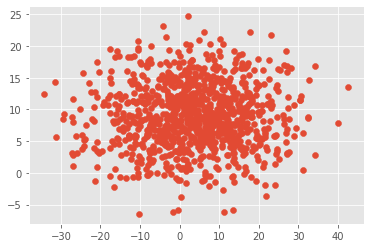

In [97]:
N = 1000
X1 = np.random.normal(4, 12, N)
X2 = np.random.normal(9, 5, N)
plt.scatter(X1, X2)
plt.show()

In [98]:
x1_sample_mean = X1.mean()
x2_sample_mean = X2.mean()
x1_sample_sigma = X1.std()
x2_sample_sigma = X2.std()
print('Sample Mean 1:', x1_sample_mean)
print('Sample Mean 2:', x2_sample_mean)
print('Sample Standard Deviation 1:', x1_sample_sigma)
print('Sample Standard Deviation 2:', x2_sample_sigma)

Sample Mean 1: 3.380514021944719
Sample Mean 2: 8.914997366448562
Sample Standard Deviation 1: 12.207720736912636
Sample Standard Deviation 2: 5.0375736554299975


Let's look at a heatmap of where we would expect to find observations given the 2D hisotgram implied by these distributions.

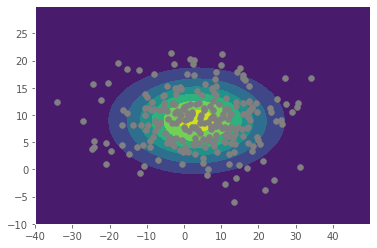

In [99]:
from scipy.stats import multivariate_normal

delta = 0.025
x1 = np.arange(-40, 50, delta)
x2 = np.arange(-10, 30, delta)
x, y = np.meshgrid(x1, x2)

pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

rv = multivariate_normal([x1_sample_mean, x2_sample_mean], [[x1_sample_sigma**2, 0.], [0., x2_sample_sigma**2]])
plt.contourf(x, y, rv.pdf(pos))

thinned_points = np.array([n in np.random.choice(N, 300) for n in range(N)])
plt.scatter(X1[thinned_points], X2[thinned_points], c='gray')

Because the two variables are independent and uncorrelated, we get nice concentric circles (ellipses, really) for our 2D histogram.

Our histogram allows us to artifically generate data that looks like our empirical data.

As we move in towards the means (towards bright areas), we're increasingly likely to draw an observation that matches our empirical dataset. As we move away from the means (towards dark areas), we're less likely to generate a point that matches our dataset. We might decide that anything in the black region is **anomalous**.

Note that because the distribution of the x2 has a ***smaller variance***, the area of high probability is much thinner vertically than it is horizontally: our histogram is ***squished*** in the vertical dimension.

### Correlated Multivariate data

What if our two datasets x1 and x2 are **correlated**, for example the way domain names and URL lengths are correlated:

Let's build a 2D dataset where the two random variables are correlated.

d:\Anaconda3.5.1\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


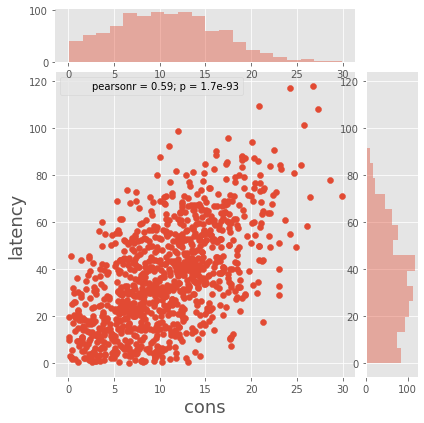

In [100]:
def positive_support_normal(mean, sigma, n):
    xs = np.random.normal(mean, sigma, n)
    for i, num in enumerate(xs):
        while num < 0:
            num = np.random.normal(mean[i], sigma)
        xs[i] = num
    return xs
    
N = 1000

mu_cons = 10
sigma_cons = 6
sigma_latency = 20
beta = 3

cons = positive_support_normal(np.array([mu_cons]*N), sigma_cons, N)
latency = positive_support_normal(beta * cons, sigma_latency, N)
ax = sns.jointplot('cons', 'latency', pd.DataFrame({'cons': cons, 'latency': latency}))

If we use our previous uncorrelated histogram, we're clearly not going to match our data, as our data is **skewed** in the diagonal, towards the origin.

We can capture the correlation between x1 and x2 by filling in the values of the correlation matrix. But the problem is, we don't know what these values are!

Let's try a few different values.

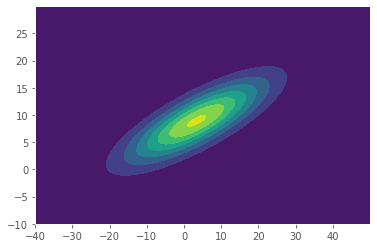

In [101]:
delta = 0.025
x1 = np.arange(-40, 50, delta)
x2 = np.arange(-10, 30, delta)
x, y = np.meshgrid(x1, x2)

pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

x1_x2_corr_sigma = 7

rv = multivariate_normal([x1_sample_mean, x2_sample_mean], 
                         [[x1_sample_sigma**2, x1_x2_corr_sigma**2], [x1_x2_corr_sigma**2, x2_sample_sigma**2]])
plt.contourf(x, y, rv.pdf(pos))

### Homework

We see that we capture our data better, but the problem is we do not know what the value of `x1_x2_sigma` might be.

Find the values of the correlation matrix

## 6. Multivariate Gaussian distribution in 3D

The plot below shows us in 3D, the independent multivariate gaussian distribution we introduced above.

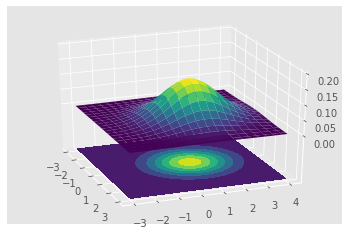

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 1. , 0], [0,  1.5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

The matrix multiplication in the exponential is achieved with NumPy's `einsum` method. The single call:
```(python)
fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
```

could be written, in the two-dimensional case as:
```(python)
fac = np.einsum('ijk,kl,ijl->ij', x-mu, Sigma_inv, x-mu)
```

and is equivalent to the following sequence of products:
```(python)
fac = np.einsum('ijk,kl->ijl', pos-mu, Sigma_inv)
fac = np.einsum('ijk,ijk->ij', fac, pos-mu)
```

The first call here is simply the dot product of the $n_x$×$n_y$×2 array pos-mu and the 2×2 covariance matrix Sigma_inv (it could be replaced with np.dot(pos-mu, Sigma_inv)) and results in another $n_x$×$n_y$×2 array. This is really a $n_x$×$n_y$ matrix of vectors, and NumPy has a hard time taking the appropriate dot product with another $n_x$×$n_y$ matrix of vectors, pos-mu: ***we want a matrix of vector dot products, not a vector of matrix dot products***. 

`einsum` allows us to explicitly state which indexes are to be summed over (the last dimension, indicated by the repeated k in the string of subscripts 'ijk,ijk->ij').

- Since SciPy 0.14, there has been a multivariate_normal function in the scipy.stats subpackage which can also be used to obtain the multivariate Gaussian probability distribution function:

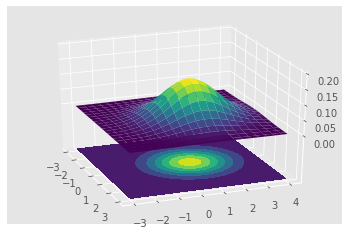

In [106]:
from scipy.stats import multivariate_normal
F = multivariate_normal(mu, Sigma)
Z = F.pdf(pos)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

Now, let's introduce some correlation between X & Y:

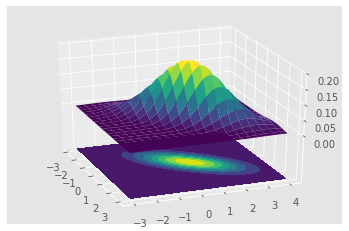

In [110]:
Sigma = np.array([[ 1. , 0.9], [0.9,  1.5]])

F = multivariate_normal(mu, Sigma)
Z = F.pdf(pos)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

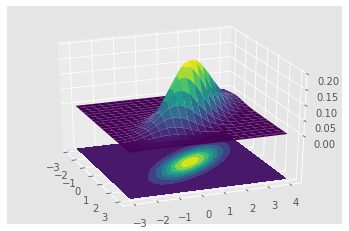

In [111]:
Sigma = np.array([[ 1. , -0.9], [-0.9,  1.5]])

F = multivariate_normal(mu, Sigma)
Z = F.pdf(pos)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

Do you see how we get a non-isotropic pattern, indicating correlation between X & Y?

## 7. Introduction to Gaussian Processes (GP)

Supervised learning can be divided into *regression* and *classification* problems. Whereas the outputs for classification are *discrete* (categorica) class labels, regression is concerned with the prediction of *continuous quantities*. For example, in a financial application, you may attempt to predict the price of a commodity as a function of interest rates, currency exchange rates, availability and demand. Or, given stats about World Cup teams, you may attempt to predict the winner of the next World Cup.

Gaussian Processes (GP) is the **state of the art** of regression modeling.

When we studied Baeysian estimation, we restricted the class of model functions to consider well known probability density functions arising in probability theory, such as **Poisson**, **Beta**, **Gamma** etc. 

Today, we're going to see that we can take priors to be *every possible function*, where higher probabilities are given to functions that we consider to be more likely, for example because they're smoother.

Has professor gone mad?! How is it possible to consider *all* possible functions? There are so many!

</br >
<center>
<img src="ipynb.images/crazyprof.png" width=300 />
</center>

### GP definition

A **Univariate** Gaussian is a distributions over real valued variables.

A **Multivariate** Gaussian is a tuple (e.g. pairs for 2 random variables, triplets for 3 random variables, etc.) of real valued variables.

A **Gaussian Process** is not a countable sequence anymore! It's a **function** of (infinite numbers of) real
valued variables.

For example: Assume I want to measure my heart rate. I bike a lot, so my resting heart rate is around 50 bpm. When I competed actively, it could hover sometimes around 39. Suppose I want to measure my heart rate 4 times a day: morning, lunch, afternoon, and bedtime. Each day, 4 times a day, I would get a measurement (different every day). From the data, I would use Bayesian estimation to evaluate the pdf of my heart rate, complete with mean and standard deviation, and plotted as a 4D mutlivariate gaussian (it would be a univariate gaussian in the morning, ***another*** univariate gaussian at lunch, ***yet another*** in the afternoon, ***and another*** at bedtime). Since some days I am well-rested, and others I may be sick or tired, I'm assuming there will be a degree of correlation between the measurements in the morning, lunch, afternoon, and bedtime. For example, if I'm very tired and have a high heart rate in the morning, chances are it will be high at lunch, too! So I expect to see a non-isotropic 4D gaussian (well, not really see, for I cannot see a 5D-plot, but let's just say *imagine* as a 3D generalization).

Then assume I get tired of measuring 4 times a day, and decide to buy a Polar watch, that automatically logs heart rate ***every 10 minutes a day***.

</br >
<center>
<img src="ipynb.images/polar-hr.jpg" width=200 />
</center>

There are 24 * 6 = 144 10-minute intervals a day, so now I have a 144D mutlivariate Gaussian. 

Assume I go nuts and decide to measure heart-rate every 10 seconds. How many dimensions does my mutlivariate Gaussian have? And what's the correlation between each univariate Gaussian? Pretty high, right?

Let's take this process to the limit, where I essentially start sampling from a **function** defined over a day on the x-axis, and heart-rate on the y-axis. That function is a [gaussian process](https://en.wikipedia.org/wiki/Gaussian_process).

Whereas a multivariate Gaussian distribution is determined by its **mean** and **covariance matrix**, a Gaussian process is determined by its **mean function**, $\mu(s)$, and **covariance function**, $C(s,t)$. 

The mean function defines the mean height of the function at each point and covariance function affects properties like the smoothness of the function, periodicity, etc. by saying how correlated each pair of points is.

You can approximate a Gaussian process on an interval by selecting S to be a grid of evenly spaced points in that interval. Then to sample from the process, you can just sample a multivariate Gaussian distribution with a covariance matrix defined by your covariance function and your mean vector defined by your mean function. If you plot your sample versus your grid, you will see a smooth curve (assuming you used a common covariance function, like the power exponential).

### Countably infinite and uncountably infinite sets

Whereas a probability distribution describes random variables which are scalars, or vectors for multivariate distributions, a *stochastic process* governs the properties of *functions*. 

And yes I know, there are an [uncountably](https://en.wikipedia.org/wiki/Uncountable_set) infinite set of functions! How are we going to compute with this set in a finite amount of time? 

We *can* deal computationally with these infinite dimensional objects because if you ask *only* for the properties of the function at a *finite* number of points (our observations), then inference in the Gaussian process will give you the same answer whether you have infinitely many other points or not.

You *can* loosely think of a function as a *very long vector* (collection), each entry of which specifies the function value $f(x)$ at a particular input $x$, right? And if our collection $[x]$ is finite, then our $[f(x)]$ collection is finite, too.

So let's consider a simple 1-d regression problem, mapping from an input $x$ to an output $f(x)$.
In the figure below we show a number of sample functions drawn at random from our prior distribution over functions which favours smooth functions. Then we freeze two observations in our posterior, so that immediately reduces the functions that we can use to those that cross these two observations. 

</br >
<center>
<img src="ipynb.images/gp-prior-posterior.png" width=500 />
</center>

So, how many functions do you think we can fit through 2 points? How many functions do you think we can fit through 5 points?
Remember our Vandermonde matrices? Specifying the points we want the polynomial to go through *froze* the polynomial for us. Let's freeze 5 points:

```python
# freeze 4 observations that our functions needs to go through
x1 = numpy.array([-3.2, -1.5, 0.3, 0.7, 2.5])    # points where we know values
y = numpy.array([ 4.5,  0.5, 0.6, 1.2, 3.5])     # values at those points
```

Go ahead, play with the observations below, modify them. You will always have the originals here above!

[-0.03180657 -0.1257808   0.64265738  0.97515726  0.25326737]
B = [[ 1.048576e+02 -3.276800e+01  1.024000e+01 -3.200000e+00  1.000000e+00]
 [ 5.062500e+00 -3.375000e+00  2.250000e+00 -1.500000e+00  1.000000e+00]
 [ 8.100000e-03  2.700000e-02  9.000000e-02  3.000000e-01  1.000000e+00]
 [ 2.401000e-01  3.430000e-01  4.900000e-01  7.000000e-01  1.000000e+00]
 [ 3.906250e+01  1.562500e+01  6.250000e+00  2.500000e+00  1.000000e+00]] 
p = [-0.03180657 -0.1257808   0.64265738  0.97515726  0.25326737]
p(x) = -0.03180657205425007x^4 + -0.12578079528543923 x^3 + 0.642657379886482 x^2 + 0.97515726018048 x + 0.253267372462419 is the unique cubic polynomial that interpolates these points.


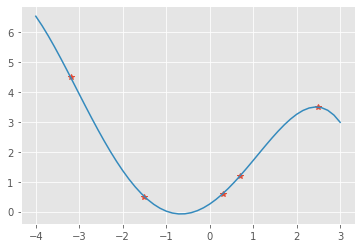

In [134]:
%matplotlib inline
import numpy
from matplotlib import pyplot
pyplot.style.use('ggplot')

# our x-axis and our vandermonde degree 3 matrix
x = numpy.linspace(-4, 3)
A = numpy.array([x**4, x**3, x**2, x, 1+0*x]).T

# freeze 5 observations that our functions needs to go through
x1 = numpy.array([-3.2, -1.5, 0.3, 0.7, 2.5])    # points where we know values
y = numpy.array([ 4.5,  0.5, 0.6, 1.2, 3.5])     # values at those points

pyplot.plot(x1, y, '*')
B = numpy.vander(x1)                     # Vandermonde matrix at the known points
p = numpy.linalg.solve(B, y)             # Compute the polynomial coefficients
print(p)
pyplot.plot(x, A.dot(p))                 # Plot the polynomial evaluated at all points
print('B =', B, '\np =', p)
print('p(x) = ' + str(p[0]) + 'x^4 + ' + 
                  str(p[1]) + ' x^3 + ' + 
                  str(p[2]) + ' x^2 + ' + 
                  str(p[3]) + ' x + ' + 
                  str(p[4]) + ' is the unique cubic polynomial that interpolates these points.')

There may be a single quartic polynomial that passes through these points, but there is a countably infinite nunmber of functions that pass through these 5 points when we consider ***all possible functions***, including polynomials higher than quartic, exponentials, gaussians, Poissons, Gammas, etc.

### Learning in a Gaussian Process

Ok, the example above just a quartic polynomial and our space of all possible functions consists of *much more* than quartic polynomials, so we have more choices and more functions that cross these points (in fact, still an uncountable infinite set). But we *did manage to restrict* our function space, if you can still talk about restricing uncountably infinite sets.

Gaussian processes (GPs) define a distribution on continuous functions with a continuous domain. We observe some points and want to assign probabilities to every possible way a curve could be drawn through those points. The hope is the curves with highest probability are very similar to that true function we can (usually) never observe. Then the question is how to assign probability to each curve. 

GPs parameterize the probability in terms of a $n$x$n$ covariance matrix: A distance function (also called a **kernel function** of the user's choice) is calculated for every pair of the $n$ total **observed points**. All this matrix does is control the GP's preference for **smoothness**. If the kernel function results in a **high value** for a pair of points, then the GP assigns a **higher probability** to functions that connect those points with a relatively *simple* curve, like a **line** (smooth, doesn't have a bunch of wiggles). What is considered smooth or not is determined by the kernel function.

Although the specific random functions that cross these points do not have a mean of zero, you can imagine that as we plot more and more of them, the mean of $f(x)$ values for any fixed $x$, for all these functions combined, would go to zero independently of $x$. 

We can also characterize the *variability* of each of these functions, by computing the pointwise difference between all possible pairs $(p,q)$ of cov$_{(p,q)}(f(x_p)$, $f(x_q))$ in our interval of interest. The more herky-jerky the function $f$ is, the higher the variance. The smoother $f$ is, the lower the variance. So each of these functions $f$ that we consider has a **covariance matrix**. In fact, it is well characterized by this matrix. What functions $f$ do we need so that the covriance matrix can be put in the form of a matrix of squared exponentials like so:

$$cov_{(p,q)}(f(x_p), f(x_q) = exp(-\frac{1}{2}(x_p - x_q)^2)$$

It turns out that if our functions $f$ are linear combonations of gaussians, the equality above holds well. We'll reexamine this in ther math section of this document. 

- It can be shown that a squared exponential covariance function corresponds to a Bayesian *linear* regression model. Also, we can also obtain that covariance function from a linear combination of an infinite number of Gaussian-shaped functions. This is called [Mercer's theorem](https://en.wikipedia.org/wiki/Mercer%27s_theorem).

Ok, good, so that is the process:

- We have a **prior distribution of functions** (see figure (a) above). We then observe **data points**. That freezes our covariance matrix for each of these functions in the prior distribution of functions. If we have 30 data points, the covariance matrix for each function $f$ will be a 30 x 30 matrix, and the matrix will contain in each cell the covariance between all pairs of these 30 points. Our family of priors are also ***shoehorned*** through these data points $(x_p, y_p)_p$ by ensuring that $f(x_p) = y_p$ for each $p$. This downselects our possible priors and yields our **posterior distribution of functions** (see figure (b) above).

</br >
<center>
<img src="ipynb.images/shoehorn.jpg" width=300 />
    ***Shoehorn***
</center>

Even when a lot of observations have been added, there is still a lot of flexibility left in the functions $f$ we can choose. 

Note that this process is a *non-parametric model*. We had to find particular parameters for a *cubic polynomial* to go through some datapoints because the set of all possible cubic polynomials is infinitely smaller than the set of all possible functions. Likewise, you'd have to find the right $(\alpha, \beta)$ parameters for a $Gamma$ to match any histogram (as you did in your homework). But with GPs, we have an *infinite* number of functions to play with, so the heck with parameters! 

Keep in mind we'll still end up with parameters for MCMC methods to optimize, so-called **hyper-parameters**, which also exist in machine learning models. But these hyperparameters will be *global* to our data, not determined by *local* considerations about which points to go through. That's why they're called *hyperparameters*.

These hyperparameters will control the smoothness (that is a *global* characteristic) of the functions $f$ we will pick. And that smoothness is determined for each function $f$ by its covariance matrix over the datapoints. 

The problem of *learning* in a Gaussian processes is exactly the problem of finding suitable *local* properties for the covariance matrix (*loca*l because the covariance matrix depends on the datapoints), which gives us functions that go though the data and thus model the underlying process that generates this data, as well as *global* characteristics of the data (smoothness, length-scale, etc.) that we can interpret.

So you see, GPs are quite different from the classical pdfs used in Bayesian estimation (Poisson, Gamma, etc.). But if they have anything to do with how our brain works, they underscore that our brain is essentially a giant geometry machine, building hypersurfaces that pass through our experiences (datapoints) and help us generalize rules about life, which we follow as best we can in order to maximize our well-being.

For example: for instructor Dino Konstantopoulos, study *very hard* for the midterm :-)

## 8. An example: linear likelihood in one variable

Here, we have a prior and posterior distributions for a single prior, $b$. On the left of the figure below, at the top, is the prior probability of b (a Gaussian) with a mean 0 and standard deviation s = 1.0.

On the left below we have the posterior distribution of b after observing the single data point Y = 3 given X = 2. This comes from Bayes Theorem which says the posterior is proportional to the prior times likelihood: $pd(b\;|\;3,2) = p_0(b)\;p(3,2\;|\;b)$.

The posterior has moved up and the variance has dropped.

</br >
<center>
<img src="ipynb.images/GPs.png" width=800 />
</center> 

In the middle of the ﬁgure on top we see the same idea shown in **functional form**: we see linear functions with slope 1.0, with a Gaussian distribution of intercepts centered at (0,0).

In the middle of the ﬁgure below we see the posterior distribution of linear functions after observing (3,2). These have moved down, with lower standard deviation.

We have marked with vertical lines the distribution at the observed point X=3, and also (for reasons given soon) at the point X=7.

Note that the standard deviation of Y is the same at all X values, including the points X=3 and X=7.

This is a 2D Gaussian, albeit one correlated, because knowing the Y value at one X value helps determine the Y value at all others (“helps” because independent observation noise occurs with each observation).

The correlation produces a prior and posterior distribution that are **elliptical** along the diagonal (cigar shaped).

Variation along the major diagonal reﬂects the uncertainty about b. Variation orthogonally represents observation noise.
To understand the connection between the Bayesian parameter approach to regression and the GPR representation of the same situation,

We must see how the left hand two columns in the ﬁgure (the usual treatment in parameter space) map onto the right hand two columns (the GPR treatment in data space). Of course the middle column, showing the functions, is common to both treatments.
We have shown this GPR data Gaussian for just two points, but the same applies for any number of points: For N points we would have an N-dimensional Gaussian, which one could try to imagine as an N-dimensional ellipsoid along the ‘major’ diagonal, with orthogonal variance due to observation noise.

Nonetheless, that N-dimensional Gaussian inherits its mean and covariance from the linear function assumption.

## 9. The Math

</br >
<center>
<img src="ipynb.images/math.png" width=300 />
</center> 

Now let's do the math assuming a simple linear model.

We have a training set $D$ of $n$ observations, $D = {(x_i, y_i) \;|\; i = 1, \cdots , n}$, where $x$ denotes an input vector (*covariates*) of dimension $D$ and $y$ denotes a scalar output or *target* (dependent variable). 

Column vector inputs for all $n$ cases are aggregated in the $D × n$ design matrix, and targets are collected in the vector $y$, so we can write $D = (X, y)$. 

In the regression setting, targets $y$ are real **tangible** values (e.g. runs scored, ball possession time, or income from stock). We are interested in making inferences about the relationship between inputs and targets, i.e. the conditional distribution of targets (e.g. runs scored), given the covariates (e.g. WARs, OPSs, BABIPs, FIPs, etc).

We will review the Bayesian analysis of the standard linear regression model with Gaussian noise:

$$f(x) = x^T w, \;\;\;y = f(x) + ε$$

where $x$ is the input vector, $w$ is a vector of weights (parameters) of the linear model, $f$ is the function value and $y$ is the observed target value. Often a bias weight or offset is included above. We'll see it when we construct artificial neural networks. We saw it with our Poisson game analytics as a home team bias. We'll omit it for now.

We assume that the observed values $y$ differ from the function values $f(x)$ by additive noise, and we will further assume that this noise follows an independent, identically distributed Gaussian distribution with zero mean and variance $σ_n^2$.

This noise assumption together with the model directly gives rise to the *likelihood*, the probability density of the observations given the parameters, which is factored over all observations. Here is where we introduce the gaussian pdf.

$$p(y\;|\;X, w) = \prod_{i=1}^n p(y_i \;|\; x_i , w) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi}\sigma_n} exp(\frac{(yi − x_i^T w)^2}{2\sigma_n^2} $$

$$p(y\;|\;X, w) =  \frac{1}{(2\pi\sigma_n^2)^{n/2}} exp(- \frac{1}{2\sigma_n^2} |\;y − X^T w\;|^2) 
$$


where $|z|$ denotes the Euclidean length of vector $z$. Neat, a product of gaussians is a gaussian.

In the Bayesian formalism, we need to specify a prior over the parameters, expressing our beliefs about the prior
parameters before we look at the observations. So we put a zero mean Gaussian prior with covariance matrix $Σ_p$ on the weight $w$:

$$w = N(0, \Sigma_p)$$

Inference in the Bayesian linear model is based on the posterior distribution $p(w \;|\;y, X)$ over the weights computed by Bayes’ rule:

$$p(w \;|\;y, X) = \frac{p(y \;|\;X, x) \; p(w)}{p(y\;|\;X)}$$


where $p(w)$ is our prior, and the normalizing constant $p(y\;|\;X)$, also known as the *marginal likelihood*, is independent of the weights and given by the law of total probability:

$$p(y\;|\;X) = \int p(y\;|\;X, w) \; p(w)\; dw$$

By plugging in for our prior and likelihood (and not worrying too much about the thorny marginal likelihood):

$$p(w \;|\;y, X) \; \propto \; N(\bar{w}, A^{-1}) \;\;\; \text{where} \; \bar{w} = \frac{1}{\sigma_n^2} A^{-1}\;X\;y \;\;\; \text{and}\; A = \sigma_n^{-2} XX^T + \Sigma_p^{-1} $$

There's some math here we skipped. For the proof, look up [Rasmussen](http://www.gaussianprocess.org/gpml). What we find is that the posterior $p(w \;|\;y, X)$ is a gaussian. The mean of the posterior distribution $p(w \;|\;y, X)$ is also called the *maximum a posteriori* (MAP) estimate of $w$.

Now, to make predictions for a test case, we average over *all* possible parameter predictive distribution values, weighted by their posterior probability. Thus the predictive distribution for $f_∗$ , or $f(x_∗)$ at $x_∗$ is given by averaging
the output of all possible linear models w.r.t. the gaussian posterior:

$$p(f_∗ \;|\; x_∗, X, y) = \int p(f_∗\;|\; x_∗, w)\; p(w\;|\; X, y) dw $$

$$p(f_∗ \;|\; x_∗, X, y) = N(\frac{1}{\sigma_n^2} x_*^T \; A^{-1} X y, \; X_*^T A^{-1} x_*) $$

The predictive distribution is again gaussian (we skipped some math here, too), with a mean given by the posterior mean of the weights multiplied by the test input.  The predictive variance is a quadratic form of the test input with the posterior covariance matrix, showing that predictive uncertainties grow with the magnitude of the test input, as one would expect for a linear model.

And so that is why the gaussian is interesting: If we assume a gaussian prior and a gaussian likelihood, the posterior is also gaussian. Thus, GPs rock!

Sometimes, the Bayesian linear model suffers from limited expressiveness (it's not flexible enough to match all the observations). A simple idea to overcome this problem is to first project the inputs into some high dimensional space using a set of basis feature space functions and then apply the linear model in this space instead of directly on the inputs themselves. This trick is called the *kernel trick*. For example, a scalar input $x$ could be projected into the space of powers of $x: \; φ(x) = (1, x, x^2, x^3, \cdots)$ using a Vandermonde matrix, to implement polynomial regression. As long as the projections are fixed functions (i.e. independent of the parameters $w$) the model is still linear in the parameters, and therefore analytically tractable.

## 10. Predictions with noise-free observations

A joint probability is a statistical measure where the likelihood of two events occurring *together* and *at the same point in time* are calculated. Joint probability is the probability of event Y occurring at the same time event X occurs. We talk about $P(X∩Y)$ or $P(X \text{and} Y)$ or $P(XY)$. 

What's the probability that you get snake-eyes (two 1's) with two dice, where X is the probability of one and Y the probability of the other? $1/6 * 1/6 = 1 / 36$, right?

From a deck of 52 cards, the joint probability of picking up a card that is red and an ace is $P(\text{ace} ∩ \text{red}) = 2/52 = 1/26$, since a deck of cards has two red aces – the ace of hearts and the ace of diamonds. You can also use a formula to calculate the joint probability: $P(\text{ace} ∩ \text{red}) = P(\text{ace}) * P(\text{red}) = 4/52 * 26/52 = 1/26$.

Don't confuse *joint probability* with *conditional probability* - the probability that one event will happen *given* that another action or event *has happened*. The conditional probability form is $P(X│Y)$ – that is, the chance of one event happening is conditional on another event happening. For example, from a deck of cards, the probability that you get an ace, given that you drew a red card is $P(\text{ace}│\text{red}) = 2/26 = 1/13$, since there are two aces out of 26 red cards. Not the same as $1/26$, right?

However, if we have the joint probability of two variables $x_1$ and $x_2$, characterized by the mean of each $\mu_1$ and $\mu_2$, and covariance matrix of the 4 possible standard deviations (self for each $\sigma_{11}$ and $\sigma_{22}$, and cross for each $\sigma_{12}$ and $\sigma_{21}$):

$$\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
\sim \mathcal{J} 
{\left(
\begin{pmatrix}
\mu_1 \\
\mu_2
\end{pmatrix}
,
\begin{pmatrix}
\sigma_{11} & \sigma_{12}\\
\sigma_{21} & \sigma_{22}\\
\end{pmatrix}
\right)}$$

It is possible to get the conditional probability $\mathcal{C}$ of one of the variables given the other (there's some math involved, just trust me on this).

Now instead of variables $x_1$ and $x_2$, assume we have a sequence of functions $f_1, \cdots, f_n$, and that some ($f$) are known (training data) while some ($f_*$) are unknown (test data). In classic Bayesian inference terminology, we talk about the known ones as *priors*, and the unknown ones as *posteriors*. In Machine learning terminology, we talk about *training data* and *test data*. But, same thing! 

We write:

$$\begin{pmatrix}
f \\
f_*
\end{pmatrix}
\sim \mathcal{C} \;
{\left(
\begin{pmatrix}
\mu \\
\mu_*
\end{pmatrix}
,
\begin{pmatrix}
K & K_*\\
K_*^T & K_{**}\\
\end{pmatrix}
\right)}$$

Here, $K$ is the matrix we get by applying a `kernel function` to our prior functions $(f)$, i.e. the similarity of each prior
to each other prior. $K_*$ gets us the similarity of the training values to the test values (or priors to posteriors) whose output values we’re trying to estimate. $K_{∗∗}$ gives the similarity of the test values (posteriors) to each other. 

The two most commonly used kernel functions in GP modeling are the *Gaussian*, and the *Matern 5/2*. The Gaussian is:

$$k(x, x') = \mathrm{exp}\left[ -\frac{(x - x')^2}{2 \ell^2} \right]$$

and for an equally spaced sampling of $x$'s tend to look like:

</br >
<center>
<img src="ipynb.images/gaussianpriors.png" width=500 />
</center>

and the Matern 5/2 is:

$$k(x, x') = \left(1 + \frac{\sqrt{5(x - x')^2}}{\ell} +
            \frac{5(x-x')^2}{3\ell^2}\right)
            \mathrm{exp}\left[ - \frac{\sqrt{5(x - x')^2}}{\ell} \right]$$
            
and for an equally spaced sampling of $x$'s tend to look (much smoother, right?) like:

</br >
<center>
<img src="ipynb.images/maternpriors.png" width=500 />
</center>
            
Hey, don't ask me why.. A lot of research went into this. Read [here](https://en.wikipedia.org/wiki/Mat%C3%A9rn_covariance_function) to learn more about the Matern 5/2.

</br >
<center>
<img src="ipynb.images/gradstudent.png" width=400 />
Graduate Student doing research. Could be *you*.
</center>

Ok, so how do we get the priors and posteriors? We get the priors by conditioning the gaussians (or the Materns) in the covariance matrix on our training datapoints. And we get the posteriors by MCMC-sampling from the posterior.


## 11. Predictions with noisy observations


It is typical for more realistic modelling situations that we do not have access to function values themselves, but only noisy versions thereof $y = f(x) + ε$. se. It follows from the statistical independence assumption about the noise, that a diagonal
matrix is added to our covariance matrix, in comparison to the noise free case.

The mean and variance of our $(f_*)$ functions are determined by some more math that we skip,but you can find it in Rasmussen. 

It turns out that the mean prediction is a linear combination of oir observations. This is sometimes referred to as a *linear predictor*.

The variance on the other hand does not depend on the observed targets, but only on the inputs. This is a property of the Gaussian distribution.

The algorithm to find mean and variance uses Cholesky decomposition, instead of directly inverting a matrix, since it is faster and numerically more stable. The algorithm actually returns the predictive mean and variance for noise-free test data $y$. To compute the predictive distribution for noisy test data $y_∗$, simply add the noise variance $σ_n^2$ to the predictive variance of $f_∗$.


## 12. Determining the hyperparameters

Typically the covariance functions will have some free parameters. There are various methods for determining the hyperparameters
from training data. Let's just skip this, ey? :-)

## 13. Optimizing the fit

In the sections rigt above, we have evaluated predictive distributions $f_*$
for the outputs $y_∗$ corresponding to new (test) input $x_∗$. The predictive distribution
is Gaussian with mean and variance given by some complicated equations you can find in Rasmussen.

In practical applications, we are often forced to make a decision about how to act, i.e. we need a point-like prediction which is optimal in some sense. To this end we need a loss function, $L$ which specifies the loss incurred by guessing the value $y_{guess}$ when the true value is $y_{true}$. For example, the loss function could equal the absolute deviation between the guess and the truth.

Neural networks do the exact same thing right? Neural networks are just predictors, and we are doing the same thing, *predicting*, only better because we have measures of uncertainty with our predictions! 

In non-Bayesian paradigms, the model is typically trained by minimizing the empirical risk (or loss). In contrast, in the Bayesian setting, there is a clear separation between the likelihood function (used for training, in addition to the prior) and the loss function. The likelihood function describes how the noisy measurements are assumed to deviate from the underlying noise-free function. The loss function, on the other hand, captures the consequences of making a specific choice, given an actual true state. The likelihood and loss function need not have anything in common.

Our goal is to make the point prediction $y_{guess}$ which incurs the smallest loss. But how can we achieve that when we don’t know $y_{true}$? Instead, we minimize expected loss, or risk, by averaging with respect to our model’s opinion as to what the
truth might be.

In general the value of $y_{guess}$ that minimizes the risk for the loss function $|\;y_{guess} − y_∗\;|$ is the median of $p(y_∗|x_∗, D)$, while for the squared loss $(y_{guess} − y_∗)^2$ it is the mean of this distribution. 

When the predictive distribution is gaussian, the mean and the median coincide! And for any symmetric loss function
and symmetric predictive distribution, we always get $y_{guess}$ as the mean of the predictive distribution.

So, just remember this: in the quantiles for the predicted pdf, pick the median, as we did for our world cup estimation to team strengths.

We skipped a good amount of math in these sections. I just distilled the essential results. MCMC packages like pymc3 make it so that we don't need to know the math to leverage the underlying methodologies for Gaussian process regression.

## 14. GP Theory Conclusion

Prediction with Gaussian processes is not a recent topic, especially for time series analysis. The basic theory goes back at least as far as the time series work of Wiener and Kolmogorov in the 1940’s. Lauritzen (1981) discusses relevant work by the Danish astronomer T. N. Thiele dating from 1880!

Relationships between Gaussian process prediction and regularization theory, splines, support vector machines (SVMs), relevance vector machines (RVMs), and infinite neural networks are desribed in Rasmussen's Chapter 6.

What we're going to do next, is use GP estimation methodologies in `pymc3` to model noisy data.

## 15. Modeling a dataset with GPs

Ready for some modeling?

Let's define points at which our family of priors will be sampled: 75 evenly spaced points between -5 and 5. 

How are we going to build the functions $f_1, \cdots, f_n$ that we're going to use as our *priors*? We're going to create a list of $x_1, \cdots, x_n$, and we're going to use the gaussian as our similarity (or kernel) function:

$$k(x_p, x_q) = \mathrm{exp}\left[ -\frac{(x_p - x_q)^2}{2 \ell^2} \right]$$

The kernel function expresses the similarity of each observed to each other observed, or in other words their degree of correlation. The gaussian calculates the squared distance between points and converts it into a measure of similarity, controlled by a tuning parameter $\ell$. We assume a mean of 0 for our prior.

So, let's create an array on the x-axis (observations), define the kernel function (a gaussian, with a parameter which represents a length squared), and build the covariance matrix of our observations. Then we obtain the Cholesky decomposition of the covariance matrix. By multiplying the Cholesky with 3 different gaussian random variates, we get 3 prior functions, which we plot, so we can admire them!

Text(0.5,1,'Three samples from the GP prior')

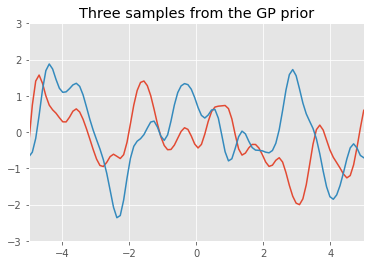

In [47]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

# Test data
n = 100
Xtest = np.linspace(-5, 5, n).reshape(-1,1)
#print(Xtest)

# Define the gaussian kernel function
def kernel(a, b, param):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)

param = 0.1
K_ss = kernel(Xtest, Xtest, param) #this is K_**

# Get cholesky decomposition (square root) of the covariance matrix
L = np.linalg.cholesky(K_ss + 1e-10*np.eye(n))

# Sample 3 sets of standard normal distributions for our test points,
# multiply them by the square root of the covariance matrix
f_prior = np.dot(L, np.random.normal(size=(n,2)))

# Now plot the 2 sampled functions
pl.plot(Xtest, f_prior)
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP prior')


<div style="text-align: right; color: gray">6</div>
Ok so the functions above have nothing to do with our data, yet. They are our priors the same way you pick some parameter values as your priors when you assume a probabilistic model like a gamma, and you want to find the posterior of the parameters given your dataset. 

Now let's simulate some data. That will be our training data: We will pick 5 $(x,y)$ points from the simulated dataset. Let's use the `sin` function to generate the dataset (the $y$ values from our $x$ values).

We use the functions above as our priors. We compute the covariance matrix of our training data, and its Cholesky decomposition. We add a small perturbation on the diagonals (`np.eye` is the matrix with 1 in its diagonals, 0 otherwise), to add stability to our Cholesky decomposition.


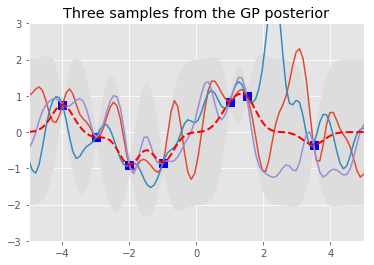

In [48]:
# Noiseless training data
Xtrain = np.array([-4, -3, -2, -1, 1, 1.5, 3.5]).reshape(7,1)
ytrain = np.sin(Xtrain)

# Apply the kernel function to our training points
K = kernel(Xtrain, Xtrain, param)
L = np.linalg.cholesky(K + 0.00005*np.eye(len(Xtrain)))

# Compute the mean at our test points.
K_s = kernel(Xtrain, Xtest, param)
Lk = np.linalg.solve(L, K_s)
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain)).reshape((n,))

# Compute the standard deviation so we can plot it
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)

# Draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,3)))

pl.plot(Xtrain, ytrain, 'bs', ms=8)
pl.plot(Xtest, f_post)
pl.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP posterior')
pl.show()


Observe how the training points (blue squares in the output above) have "corraled" the set of possible functions: The ones we sampled from the posterior to go through the training points. The dotted red line shows the mean output and the grey area shows 2 standard deviations from the mean. 

Note that the standard deviation is 0 at our training points because we did not add any noise to our data. Also note how things start to go a bit wild again to the right of our last training point $x = 1$. That won’t get reined in until we observe some data over there, or by adding additional constraints on the herky-jerky nature of our posterior functions.


## 16. Using PyMC3 to do GP estimation

Ok, so the computation above only used `numpy`. Now we're going to leverage `PyMC3` to do GP estimation. This is *advanced* data science. Keep that in mind.

PyMC3's `gp.Marginal` class implements a common case of GP regression, where the observed data are the sum of a GP and Gaussian noise. In other words, the observations $y$ are the unknown function to model, plus noise:

$$\begin{split}\begin{aligned}
  \epsilon &\sim N(0, \Sigma) \\
  y &= f(x) + \epsilon \\
\end{aligned}\end{split}$$

We are going to use the [Matern](https://en.wikipedia.org/wiki/Mat%C3%A9rn_covariance_function) 5/2, a smooth kernel function. 

We draw random samples from a [multivariate normal distribution](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.multivariate_normal.html) (generalization of the one-dimensional normal distribution to higher dimensions), which we're not supposed to know (we're going to use that to match with the final result to see how well our model performs). Then we add some noise with `σ_true * np.random.randn(n)` and *that* becomes our observations (what we know). We flatten to one dimension using numpy's `.flatten()` (read [here](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.ndarray.flatten.html0)). And we plot the original data (generator) and the noisy data (observations). Change the random seed and see the data change!

It is a well-known fact that when two training inputs are too close in input space, the covariance matrix may become not-positive definite. As a result, the [Cholesky decomposition](https://en.wikipedia.org/wiki/Cholesky_decomposition) of the covariance matrix, necessary for GP computations, may fail due to numerical error. The standard solution to alleviate ill-conditioning is to add a **ridge** or **nugget** to the diagonal of the covariance matrix, which amounts to adding (or increasing, if already present) **observation noise**. We do this below with `+ 1e-8*np.eye(n)`. We're inoculating ourselves to ill-conditioning. But just to be safe, we don't take *too many* data points, just 100 between 0 and 10. If you blow up with a different seed or by changing any other parameters, I'd like to take a look..

Another option consists in just altering the troublesome points. Essentially, the observation is that close-by points are highly redundant, in fact so redundant that they reduce the rank of the covariance matrix. Since one those points is contributing little information to the problem at hand, removing one or the other (or averaging them, or "bouncing" one point away from the other to some minimal acceptable distance) will not really change your solution all that much.

BTW, if anyone thinks this math is too tough, note that PyMC3's `gp.Marginal` was written by students (like you) at Google's summer code camp 2017 (go [here](https://github.com/pymc-devs/pymc3/releases) and browse over to the manifest for v3.2 Final: *This version includes two major contributions from our Google Summer of...*). Wanna work for Google?

</br >
<center>
<img src="ipynb.images/googleTshirt.png" width=200 />
</center>


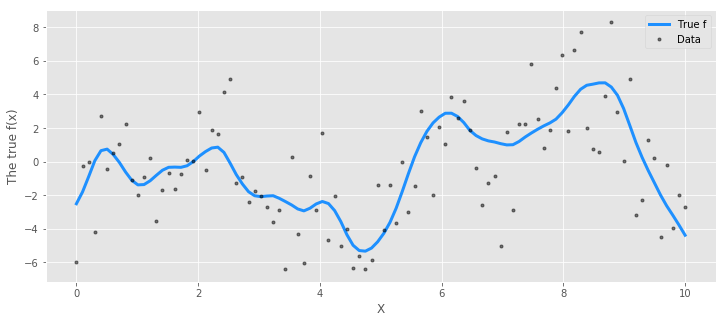

In [49]:
import pymc3 as pm
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# set the seed
np.random.seed(25)

n = 100 # The number of data points
X = np.linspace(0, 10, n)[:, None] # The inputs to the GP, note: They must be arranged as a column vector for PyMC3

# Define the true covariance function and its hyper-parameters
ℓ_true = 1.0
η_true = 3.0
cov_func = η_true**2 * pm.gp.cov.Matern52(1, ℓ_true)

# A mean function that is zero everywhere
mean_func = pm.gp.mean.Zero()

# The latent function values are one sample from a multivariate normal distribution
# Note that we have to call `eval()` because PyMC3 is built on top of Theano
f_true = np.random.multivariate_normal(mean_func(X).eval(),
                                       cov_func(X).eval() + 1e-8*np.eye(n), 1).flatten()

# The observed data is the latent function plus a small amount of Gaussian noise
# The standard deviation of the noise is `sigma`
σ_true = 2.0
y = f_true + σ_true * np.random.randn(n)

## Plot the data and the unobserved latent function
fig = plt.figure(figsize=(12,5)); ax = fig.gca()
ax.plot(X, f_true, "dodgerblue", lw=3, label="True f");
ax.plot(X, y, 'ok', ms=3, alpha=0.5, label="Data");
ax.set_xlabel("X"); ax.set_ylabel("The true f(x)"); plt.legend();

<div style="text-align: right; color: gray">8</div>
Now that we have our observations $y$, we model the hyperparameters as a gamma and two Half-Cauchys. The [Cauchy](https://en.wikipedia.org/wiki/Cauchy_distribution) distribution is used quite  bit in stastics, and in particular the half-Cauchy has had a lot of [success](http://andrewgelman.com/2011/07/13/on_the_half-cau/) in modeling Bayesian model hyperparameters. Don't worry about this. This is just trial and error of many different ways to model hyperparameters, and this one is particularly successful.

We run an MCMC algorithm to find the [Maximum A Posteriori](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) (MAP) estimate of the hyperparameters and tabulate them.

In [65]:
with pm.Model() as model:
    #ℓ = pm.Gamma("ℓ", alpha=2, beta=1)
    ℓ = pm.HalfCauchy("ℓ", beta=1)
    η = pm.HalfCauchy("η", beta=5)

    cov = η**2 * pm.gp.cov.Matern52(1, ℓ)
    gp = pm.gp.Marginal(cov_func=cov)

    σ = pm.HalfCauchy("σ", beta=5)
    y_ = gp.marginal_likelihood("y", X=X, y=y, noise=σ)

    mp = pm.find_MAP()

logp = -242.73, ||grad|| = 0.44942: 100%|██████████| 14/14 [00:00<00:00, 263.62it/s]  


In [66]:
# collect the results into a pandas dataframe to display
# "mp" stands for marginal posterior
pd.DataFrame({"Parameter": ["ℓ", "η", "σ"],
              "Value at MAP": [float(mp["ℓ"]), float(mp["η"]), float(mp["σ"])],
              "True value": [ℓ_true, η_true, σ_true]})

Parameter  True value  Value at MAP
0         ℓ         1.0      0.575690
1         η         3.0      2.400311
2         σ         2.0      2.185096

We used the GP + noise to find the optimal hyperparameters.

PyMC3's `.conditional` has an optional flag for `pred_noise`, which defaults to False. When `pred_noise=False`, the conditional method produces the predictive distribution for the underlying function represented by the GP. When `pred_noise=True`, the conditional method produces the predictive distribution for the GP plus noise.

Let's plot just the estimated GP without the noise on an increased x-axis.

In [67]:
# new values from x=0 to x=20
X_new = np.linspace(0, 20, 600)[:,None]

# add the GP conditional to the model, given the new X values
with model:
    f_pred = gp.conditional("f_pred", X_new)

# To use the MAP values, you can just replace the trace with a length-1 list with `mp`
with model:
    pred_samples = pm.sample_ppc([mp], vars=[f_pred], samples=2000)

100%|██████████| 2000/2000 [01:26<00:00, 23.18it/s]


and plot. Note that the shading underscores that we're plotting a probability distribution, so it's maximal at the core and then dies out towards its standard deviations.

In [68]:
# plot the results
fig = plt.figure(figsize=(12,5)); ax = fig.gca()

# plot the samples from the gp posterior with samples and shading
from pymc3.gp.util import plot_gp_dist
plot_gp_dist(ax, pred_samples["f_pred"], X_new);

# plot the data and the true latent function
plt.plot(X, f_true, "dodgerblue", lw=3, label="True f");
plt.plot(X, y, 'ok', ms=3, alpha=0.5, label="Observed data");

# axis labels and title
plt.xlabel("X"); plt.ylim([-13,13]);
plt.title("Posterior distribution over $f(x)$ at the observed values"); plt.legend();

Ok, so the reason the posterior is so close to the True generating function is because we only predicted $f_∗$, not $f_∗$ + noise, which is what we actually observe. So let's set `pred_noise=True`.

In [54]:
with model:
    y_pred = gp.conditional("y_pred", X_new, pred_noise=True)
    y_samples = pm.sample_ppc([mp], vars=[y_pred], samples=2000)

100%|██████████| 2000/2000 [01:30<00:00, 22.19it/s]


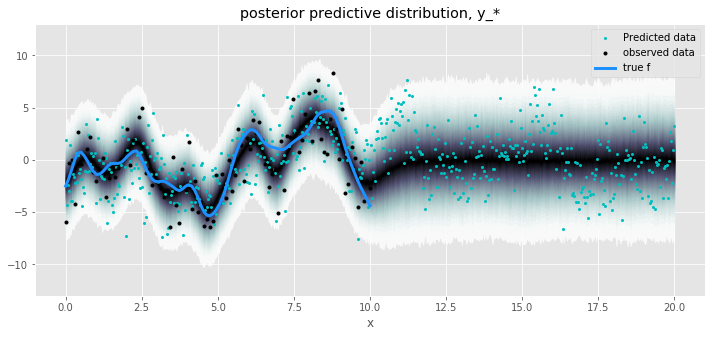

In [55]:
fig = plt.figure(figsize=(12,5)); ax = fig.gca()

# posterior predictive distribution
plot_gp_dist(ax, y_samples["y_pred"], X_new, plot_samples=False, palette="bone_r");

# overlay a scatter of one draw of random points from the
#   posterior predictive distribution
plt.plot(X_new, y_samples["y_pred"][800, :].T, "co", ms=2, label="Predicted data");

# plot original data and true function
plt.plot(X, y, 'ok', ms=3, alpha=1.0, label="observed data");
plt.plot(X, f_true, "dodgerblue", lw=3, label="true f");

plt.xlabel("x"); plt.ylim([-13,13]);
plt.title("posterior predictive distribution, y_*"); plt.legend();

The posterior predictive density is wider than the conditional distribution of the noiseless function, and reflects the predictive distribution of the noisy data, which is marked as black dots. 

But see how our simulated data points match the observed data points pretty well? This is exactly what machine learning is about: We have some observations, and we use these observations to build a model. Then we throw away the data, and we can use our model to predict the process uderlying our original observations with very close statistical matching. 

We can also use PyMC3's `.predict` method to return the mean and variance given a particular point. `.predict` returns the same mean and covariance that the distribution of `.conditional` has.

In [56]:
# predict
mu, var = gp.predict(X_new, point=mp, diag=True)
sd = np.sqrt(var)

and plot:

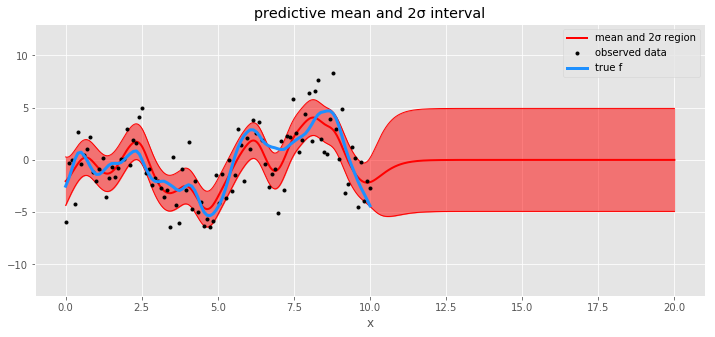

In [57]:
# draw plot
fig = plt.figure(figsize=(12,5)); ax = fig.gca()

# plot mean and 2σ intervals
plt.plot(X_new, mu, 'r', lw=2, label="mean and 2σ region");
plt.plot(X_new, mu + 2*sd, 'r', lw=1); plt.plot(X_new, mu - 2*sd, 'r', lw=1);
plt.fill_between(X_new.flatten(), mu - 2*sd, mu + 2*sd, color="r", alpha=0.5)

# plot original data and true function
plt.plot(X, y, 'ok', ms=3, alpha=1.0, label="observed data");
plt.plot(X, f_true, "dodgerblue", lw=3, label="true f");

plt.xlabel("x"); plt.ylim([-13,13]);
plt.title("predictive mean and 2σ interval"); plt.legend();

## 17. Gaussian Mixture Models

Gaussian Mixture Models (GMM) are a neat methodolgy for modelling observations that stem from multiple groupings. 

A **mixture model** is a probabilistic model for representing the presence of subpopulations within an overall population, without requiring that an observed data set should identify the sub-population to which an individual observation belongs. 

Mixture models are used to make statistical inferences about the properties of sub-populations given only observations on the pooled population, without sub-population identity information.

Let's draw normal distributions from 3 different populations and mix them in.


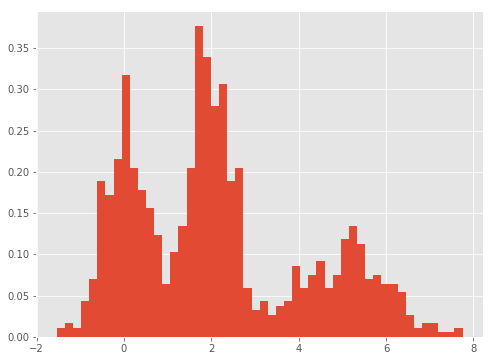

In [58]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pymc3 as pm
import seaborn as sns

SEED = 25
np.random.seed(SEED) 

N = 1000
W = np.array([0.35, 0.4, 0.25])
MU = np.array([0., 2., 5.])
SIGMA = np.array([0.5, 0.5, 1.])

component = np.random.choice(MU.size, size=N, p=W)  #1st arg: arange(MU.size), p: probabilities associated with each 1sy arg entry 
x = np.random.normal(MU[component], SIGMA[component], size=N) #random samples from a normal distribution @ 1st arg

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(x, bins=50, normed=True, lw=0);

Specify and fit a marginalized Gaussian mixture model (GMM) to this data in `PyMC3`. Here, we introduce a new pdf called *Dirichlet*, which we're going to revisit in the second part of our semester, when we refocus on NLP. Ther Dirichlet distribution is the multivariate generalization of the beta distribution (our "baseball" distribution, used to model the behavior of random variables limited to intervals of finite length). 

The Dirichlet pdf does not sample from the space of real numbers, like the normal pdf does. Instead it samples over a probability simplex (probabilities over $n$ distinct categories, representing the dimensions of our multivariate distribution). A 4-dimentional Dirichlet distribution has 4 parameters. So, it's tailor-made for mixture models.

In [59]:
with pm.Model() as model:
    w = pm.Dirichlet('w', np.ones_like(W))  #array of ones with the same shape and type as W

    mu = pm.Normal('mu', 0., 10., shape=W.size)
    tau = pm.Gamma('tau', 1., 1., shape=W.size)

    x_obs = pm.NormalMixture('x_obs', w, mu, tau=tau, observed=x)

In [60]:
with model:
    trace = pm.sample(5000, n_init=10000, tune=1000, random_seed=SEED)[1000:]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
D:\Anaconda\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|██████████| 6000/6000 [00:36<00:00, 165.15it/s]


The posterior distribution on the weights and the component means has captured the true value quite well:

In [69]:
pm.traceplot(trace, varnames=['w', 'mu', 'tau']);

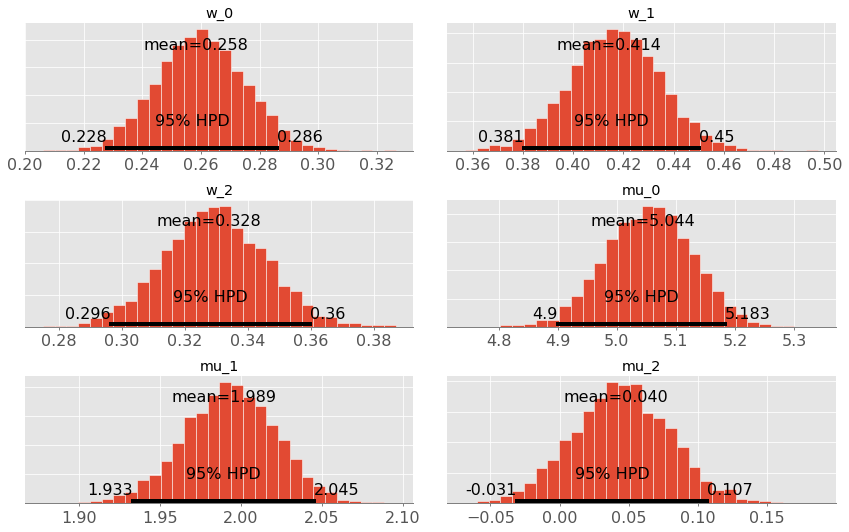

In [62]:
pm.plot_posterior(trace, varnames=['w', 'mu']);

Let's sample from the model’s posterior predictive distribution:

In [63]:
with model:
    ppc_trace = pm.sample_ppc(trace, 5000, random_seed=SEED)

100%|██████████| 5000/5000 [00:02<00:00, 2147.58it/s]


and let's plot:

In [64]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(x, bins=50, normed=True,
        histtype='step', lw=2,
        label='Observed data');

ax.hist(ppc_trace['x_obs'], bins=50, normed=True,
        histtype='step', lw=2,
        label='Posterior predictive distribution');

ax.legend(loc=1);

Not too shabby...

So, our study of GPs and then GMMs stem from a question one of you asked me in class a few weeks ago: "*professor, how do I model data that seems like it's constituted from multiple distributions, each with its own mean*"?

So I thought: Darn, the only way I can answer that is with GPs and GMMs... How can I present this theory so it's simple enough to understand?

Well, hopefully now you know.

Is this applicable to the World Cup? Well, if a team is comprised of 11 players, each with his own abilities in passes or distance covered (with a superstar on some teams with way above average abilities, e.g. a Christiano Ronaldo, or a Lionel Messi), then team abilities could be modeled as a GMM. That way, you could go from individual player rankings to complete team rankings.

## 18. Conclusion

A **covariance function** is the crucial ingredient in a Gaussian process predictor. It ***encodes our assumptions about the function which we wish to learn*** and which ***passes through all our observations*** and ***has the highest probability to represent the rule behind the process*** that generates our observations. 

In **supervised learning**, the notion of similarity between data points is *crucial*. It is a basic similarity assumption that points with inputs $x$ which are close, are likely to have similar target values $y$, and thus training points (prior distributions) that are near to a test point (posterior distributions) should be informative about the prediction at that point. Under the Gaussian process view, it is the covariance function that deﬁnes nearness or similarity.

</br >
<center>
<img src="ipynb.images/GPs2.png" width=900 />
    *Observations define the data points that inform likelhood, mean, and covariance functions*
</center>
<br />

How do GPs differ from classical Bayesian estimation? Rather than work in **parameter space**, which is where all the priors live, we can bypass it by just working in **data space**. This allows us to worry only about how different data points relate to one another without needing to specify the parameters of the data generating process. We say that this method is non-parametric, in the same way that regression trees are non-parametric.

The posterior predictive distribution encapsulates our uncertainty about the data generating process. The choice of covariance kernel —which says how different observations inform one another—, implies certain properties of the data generating process. This *could be thought of* as a hyperparameter.

Here's some math that we *did not* mention, but which is important should you decide to concentrate more on GPs:

[Mercer’s theorem](https://en.wikipedia.org/wiki/Mercer%27s_theorem) allows you to express the covariance function (under certain conditions) in terms of its **eigenfunctions and eigenvalues**.

A general name for a function $k$ of two arguments mapping a pair of inputs$x ∈ X$, $x_0 ∈ X$ into the set of real numbers is called a **kernel**. This term arises in the theory of integral [operators](https://en.wikipedia.org/wiki/Operator_theory).

Given a set of input points ${x_i\;|\;i = 1,\cdots,n}$ we can compute the [Gram matrix](https://en.wikipedia.org/wiki/Gramian_matrix) $K$ whose entries are $K_{ij} = k(x_i,x_j)$. If $k$ is a covariance function, we call the matrix $K$ the **covariance matrix**.

A real $n × n$ matrix $K$ which satisﬁes $Q(v) = v^TKv ≥ 0$ for all vectors $v$ $∈ R^n$ is called **positive semideﬁnite** (PSD). If $Q(v) = 0$ only when $v = 0$, the matrix is **positive deﬁnite**. $Q(v)$ is called a **quadratic form**. A symmetric matrix is PSD if and only if all of its eigenvalues are non-negative. A Gram matrix corresponding to a general kernel function need not be PSD, but the Gram matrix corresponding to a covariance function is PSD.

The theoretical basis for GPs was developed by the French mathematician [Georges Matheron](https://en.wikipedia.org/wiki/Georges_Matheron) in 1960, based on the Master's thesis of [Danie G. Krige](https://en.wikipedia.org/wiki/Danie_G._Krige), the pioneering plotter of distance-weighted average gold grades at the Witwatersrand reef complex in South Africa. Krige sought to estimate the most likely distribution of gold based on samples from a few boreholes. Thus, [kriging](https://en.wikipedia.org/wiki/Kriging). [Norbert Wiener](https://en.wikipedia.org/wiki/Norbert_Wiener) (USA) and [Andrey Kolmogorov](https://en.wikipedia.org/wiki/Andrey_Kolmogorov) (Russia) pioneered some of the earlier, related, work on interpolation techniques.

Once again, in a nushell: $N$ samples from a function are normally distributed, where the covariance between *any two* samples is the covariance function (or kernel) of the Gaussian process evaluated at the spatial location of the two points. A set of values (training points) is then observed, each value associated with a spatial location. Now, a new value (test point) can be predicted at any new spatial location, by combining the Gaussian prior with a Gaussian likelihood function for each of the observed values. The resulting posterior distribution is also Gaussian, with a mean and covariance that can be simply computed from the observed values, their variance, and the kernel matrix derived from the prior.

GPs are a very expressive theoretical framework. No analytic prior to remember other than picking the right kernel functions, appropriate to the observations' smoothness and other global characteristics (picking hyperparameters continues to be the most delicate, unavoidable, part. Even in Machine Leanring! I've been to a few [talks](http://proceedings.mlr.press/v54/jun17a/jun17a.pdf) that posit parameterless approaches, but so far too soon to tell). 

To learn [more](http://www.gaussianprocess.org/gpml/) about GPs, [more](http://people.cs.ubc.ca/~murphyk/MLbook/) about probabilistic machine learning, visit the links and play around with the experiments in this notebook.